In [1]:
import numpy as np
import pandas as pd

In [2]:
import tools

In [3]:
import matplotlib.pyplot as plt
%matplotlib notebook

# Building Model

In [11]:
def get_data():
    """
    Parameters
    ----------
    none
    
    Return
    ------
    temps: numpy.ndarray of dtype: float
    day, month, year: list containg 'str' objects
    """
    dataset = pd.read_csv('dataset.csv')
    # Date spiltting into day, month, year
    day = []
    month = []
    year = []

    for i in dataset['Date']:
        splitted = i.split('/')
        day.append(int(splitted[0]))
        month.append(int(splitted[1]))
        year.append(int(splitted[2]))
        
    # pandas.core.series.Series into numpy.ndarray of dtype: float
    temps = np.array(dataset['Temperature F'])
    return (temps, year, month, day)

day, month, year, temps = get_data()
# print(day[0], type(day[0]))
# print(month[0], type(month[0]))
# print(year[0], type(year[0]))

In [12]:
def build_temp_calendar(temps, year, month, day):
    """
    Create an array of median temperature by day-of-year of length 366
    DAy 0 - Jan 1, etc....
    
    Parameters
    ----------
    temps: array of float
    year, month, day: array of int
    
    Return
    ------
    median_temp_calendar: array of floats
    """
    temps = np.array(temps)
    # find_day_of_year(1998, 8, 6)
    day_of_year = np.zeros(np.array(temps).size) # 6739 zeros
    for i_row in range(temps.size): # 6739 times
        day_of_year[i_row] = tools.find_day_of_year(    
        year[i_row], month[i_row], day[i_row])    # year[0]=1998, month[0]=8, day[0] = 1
    
    ## Create 10-day medians for each day of the year.
    median_temp_calendar = np.zeros(366)  # For leap yr contain 366 zeros
    # ten_day_medians = np.zeros(temps.size) # 6739 zeros
    
    for i_day in range(0, 365):
        low_day = i_day - 5 # -5 to 359
        high_day = i_day + 4 # 4 to 368
        if low_day < 0:
            low_day += 365
        if high_day > 365:
            high_day += -365
        if low_day < high_day: 
            i_window_days = np.where(
                np.logical_and(day_of_year >= low_day,    # Jan 1  >>> 0
                               day_of_year <= high_day))  # Dec 31 >>> 364
        else:
            i_window_days = np.where(
                np.logical_or(day_of_year >= low_day,
                              day_of_year <= high_day))
            
        ten_day_median = np.median(temps[i_window_days])  # 79.0
        median_temp_calendar[i_day] = ten_day_median
        # ten_day_medians[np.where(day_of_year == i_day)] = ten_day_median
        
        if i_day == 364:
            # ten_day_medians[np.where(day_of_year == 365)] = ten_day_median
            median_temp_calendar[365] = ten_day_median
        
    return median_temp_calendar

# build_temp_calendar(temps, year, month, day)

In [13]:
def get_three_day_coefficients(residuals):
    """
    Parameteres
    -----------
    residuals: array of floats
    
    Returns
    -------
    slope, intercept: floats
        Coefficient of the line showing thw relationship
        between deseasonalized temperatures and those
        three days into the future
        
    residuals[:-3] - 3 days before
    residuals[3:] - 3 days after
    """
    Slope, Intercept = np.polyfit(residuals[:-3], residuals[3:], 1)
    return (Slope, Intercept)

In [14]:
def find_seasonal_temp(year, month, day):
    """
    For a given day, month, and year, find the seasonal 
    high temperature for Fort Lauderdale Beach.

    Parameters
    ----------
    year, month, day: int
        The date of interest

    Returns
    -------
    seasonal_temp: float
    """
    doy = tools.find_day_of_year(year, month, day)
    seasonal_temp = temp_calendar[doy]
    return seasonal_temp

In [15]:
def deseasonalize(temp, doy):
    """
    Deseasonalize a temperature by subtracting out the annual trend.

    Parameters
    ----------
    temp: float
    doy: int

    Return
    ------
    deseasonalized_temp: float
    """
    doy = tools.find_day_of_year(year, month, day)
    prediction = temperature_calendar[doy]
    return prediction

In [16]:
def predict(year, month, day, temperature_calendar):
    """
    For a given day, month, year, predict the 
    high temporature for dataset
    
    Parameters
    ----------
    year, month, day: ints
        The day of intrest
    teporature_calendar: array of floats
    past_temp: float
        The temperature from 3 days before the date of interest.
        Jan 1 = 0, etc....
    """
    # Make a prediction for a single day.
    doy = tools.find_day_of_year(year, month, day)
    prediction = temperature_calendar[doy]
    return prediction

In [21]:
if __name__ == "__main__": 
    temps, year, month, day = get_data()
    temp_calendar = build_temp_calendar(temps, year, month, day)
#     print(temp_calendar)
    for test_day in range(1, 10+1):
        test_year = 2015 
        test_month = 6
        prediction = predict(test_year, test_month, test_day,  temp_calendar)
        print(test_year, test_month, test_day, prediction) 

2015 6 1 91.25
2015 6 2 91.3
2015 6 3 91.3
2015 6 4 91.4
2015 6 5 91.4
2015 6 6 91.75
2015 6 7 91.8
2015 6 8 91.75
2015 6 9 91.4
2015 6 10 91.45


<IPython.core.display.Javascript object>


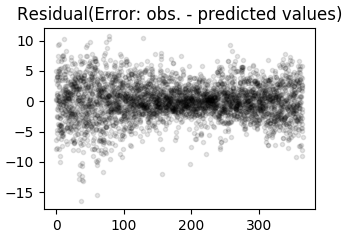

Text(0.5, 1.0, 'Residual(Error: obs. - predicted values)')

In [24]:
# Taking out residual: Difference of obs. - predicted value
residuals = np.zeros(temps.size)
doy = np.zeros(temps.size)
for i, temp in enumerate(temps):
    predicted_temp = predict(year[i], month[i], day[i], temp_calendar)
    residuals[i] = temp - predicted_temp  # Observed - predicted,    doy[0] >>> 212.0
    doy[i] = tools.find_day_of_year(year[i], month[i], day[i])   # residuals[0] >>> 1.0

# This graph shows residual it is better to close to 0 of Y-axis means less residual
# Concusion:
    # This graph shows that during winter temperature drop down unexpectedly
    # but in summer it has high chances that temperature remain constant which closly grouped at Y=0
    # Thus residuals are small having good chance of prediction
    
tools.scatter(doy, residuals)
plt.xlabel("days")
plt.ylabel("Residual")
plt.title("Residual(Error: obs. - predicted values)")

In [25]:
# Low correlation of resdual mean not best to predict
corr_residuals = tools.find_autocorr(residuals)
for day,corr_residual in enumerate(corr_residuals):
    if day == 11: break
    print(f"Day {day+1}: {corr_residual}")

Day 1: 0.6874324994516569
Day 2: 0.5012956216597984
Day 3: 0.3733982230574203
Day 4: 0.3014345756576791
Day 5: 0.250613113998296
Day 6: 0.2166064915963116
Day 7: 0.19174230867734343
Day 8: 0.177053307691077
Day 9: 0.14688660244654825
Day 10: 0.12362476811364281
Day 11: 0.10691989151302558


<IPython.core.display.Javascript object>


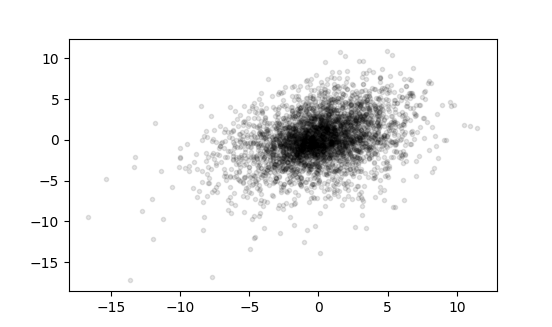

In [29]:
# Deseasonalized temporature of 1 day on X-axis
# Deseasonalized temporature after 3 day on Y-axis
tools.scatter(residuals[:-7], residuals[7:])

In [32]:
# RMSE: Root Mean Squared Error (this can be biased by outliars)
# MEA: Mean Absolute Error(This is quit beneficial as has less bieased by outliars)
rmse_before = 'RMSE before: ', np.sqrt(np.mean(residuals**2))
mea_before = "MEA before: ", np.mean(np.abs(residuals))

<IPython.core.display.Javascript object>


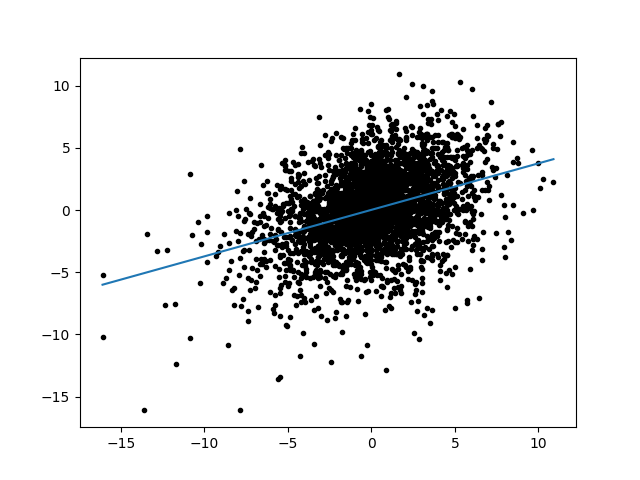

In [34]:
# residuals[:-3] - 3 days before
# residuals[3:] - 3 days after

slope, intercept = get_three_day_coefficients(residuals)

plt.plot(residuals[:-3], residuals[3:], 'k.')
x_min = np.min(residuals)
x_max = np.max(residuals)
plt.plot([x_min, x_max],
        [intercept + slope * x_min,
        intercept + slope * x_max])

In [35]:
# RMSE: Root Mean Squared Error (this can be biased by outliars)
# MEA: Mean Absolute Error(This is quit beneficial as has less bieased by outliars)
three_day_residuals = residuals[3:] - (
    intercept + slope * residuals[:-3]) 

rmse_after = 'RMSE before: ', np.sqrt(np.mean(three_day_residuals **2))
mea_after = "MEA before: ", np.mean(np.abs(three_day_residuals))

### Result we have
print("RMSE")
print("Before:",  rmse_before)
print("After:",  rmse_after)

print('\nMEA')
print("Before:",  mea_before)
print("After:",  mea_after)

RMSE
Before: ('RMSE before: ', 2.9919219573755202)
After: ('RMSE before: ', 2.7758261937699658)

MEA
Before: ('MEA before: ', 2.2492305082441506)
After: ('MEA before: ', 2.090754003129972)
